# **Hinge Loss Classification with Confusion Matrix Evaluation**

## Data Preprocessing

In [1]:
"""data source: Autoencoder Entanglement detection optimizer
https://gitlab.com/quantum-machine-learning/autoencoder-entanglement-detection-optimizer
to run this code, download the file and change the file = pd.read_pickle() bellow to your file address"""

import pandas as pd
import numpy as np
file = pd.read_pickle(r"C:\Users\Maryam\Desktop\8th term\ML\E4.ML\data_5\data_5")
x=file.iloc[:,:-1]  
y=file.iloc[:,-1]
x=np.hstack((np.ones((x.shape[0],1)),x)) #adding an intercept (a constant feature)

# preprocessing

#splitting the train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=np.array(x_train) #making it to the np.array format helps us work with it
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#we need scaling to limit the ws
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Hinge Loss Function

In [2]:

def hingeloss(x,y, w):
    Y=2*y-1  # converting [0,1] to [-1,1] to make it ready for hinge
    Ypred=x@w
    L=1-Y*Ypred
    return np.mean(np.maximum(0, L)) #mean is needed because L is an array


def hingeloss_grad(x,y,w):
    Y=2*y-1  # converting [0,1] to [-1,1] to make it ready for hinge
    Ypred=x@w
    L=1-Y*Ypred
    indicator=(L>0).astype(int) # because of max we cant take grad easily so we need this line: if L>0 the grad will be -(x.T@(Y*indicator))/len(Y) & if it is L<0 then grad will be 0
    grad=-(x.T@(Y*indicator))/len(Y)
    return grad

## Model Optimization with Gradient Descent

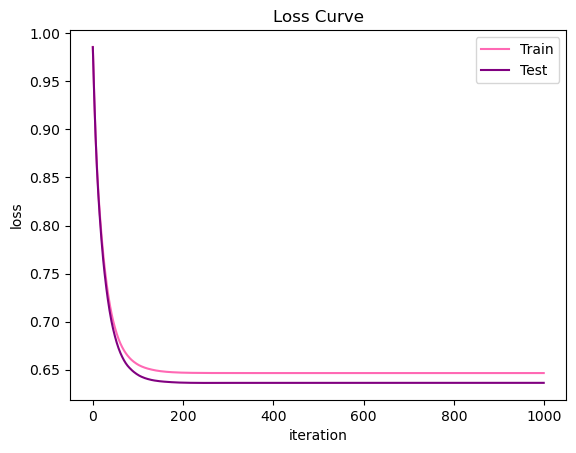

In [3]:
import matplotlib.pyplot as plt
def GD(x,y,η,iteration,x1,y1):
    LOSS_train=[]
    LOSS_test=[]
    w=np.random.rand(17)*0.01 #the matrice of w will be updated later #17 IS THE NUM OF FEATURES+1
    for j in range(iteration):
        w-=η*hingeloss_grad(x,y,w) #GD formula : w=w+η*(dl/dw) #η=learning rate
        LOSS_train.append(hingeloss(x,y, w))
        LOSS_test.append(hingeloss(x1,y1, w))
    return w,LOSS_train,LOSS_test

loss_gd=GD(x_train,y_train,0.1,1000,x_test,y_test)
itr=[]
for i in range(1000):
    itr.append(i)
plt.plot(itr,loss_gd[1],label="Train",color='hotpink') #LOSS_train
plt.plot(itr,loss_gd[2],label="Test",color="purple") #LOSS_test
plt.title("Loss Curve")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.show()

## Model Evaluation with Confusion Matrix

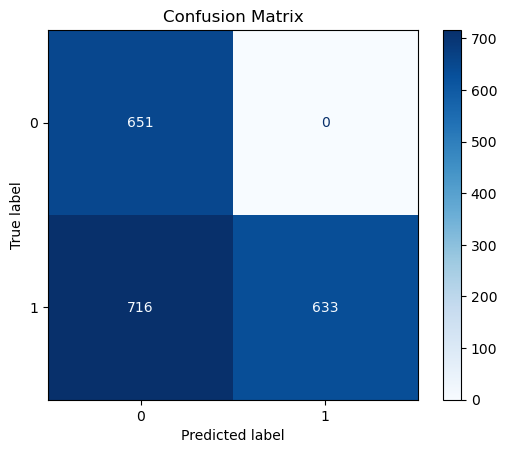

In [4]:
#for making confusion matrice we need to make ypred in the format of classification [0,1] (like the y_test) so we nned first sigmoid(normalazing data & having the ability of making a threshold) then make it 0 or 1 using the threshold
def sigmoid(x):
    return 1/(1+np.exp(-x))


ysigmoid=sigmoid(x_test@loss_gd[0])
ypred=(ysigmoid>= 0.5).astype(int) #the ones more than 0.5 (threshold) will be 1 and other will be 0 (LIKE SIGN FUNCTION)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(y_test, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
disp.plot(cmap="Blues")  
plt.title("Confusion Matrix")  
plt.show()